### ME5: Simple Linear Regression on COVID-19 Datasets


#### Learning the data using visualization and simple linear regression

1. First, run the examples and understand the ML process and be familir with Python package functions for simple linear regression. 

2. Apply exploratory data analysis and simple regression on COVID-19 dataset(s). 

#### Write your name and your collaborators if any.

-

- 

### Part 0: Recap of regression model evaluation

#### Regression modeling

Cross validation:
- https://scikit-learn.org/stable/modules/cross_validation.html

Model evaluation:
- https://scikit-learn.org/stable/modules/model_evaluation.html

Linear regression:
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

Logistic regression (In general, logistic regressions are used for classification):
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

#### Model evaluation metrics for regression models

First, Let's review model evaluation metrics for regression models. 

Evaluation metrics for classification problems, such as **accuracy**, are not useful for regression problems. Instead, we need evaluation metrics designed for comparing continuous values.

Let's create some example numeric predictions, and calculate **three common evaluation metrics** for regression problems:


**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

#### The R2 ("r-squared") Regression Score

- Measures how well a prediction model for regression fits the given data.

- The score is between 0 and 1:

     - A value of 0 corresponds to a constant model that predicts the mean value of all training target values.

     - A value of 1 corresponds to perfect prediction

- Also known as "coefficient of determination"

## Part 0 - Simple Linear Regression Examples

Two linear regression models:

(1) A real dataset: each data tuple has one attribute in X and its corresponding y value. 

(2) A synthetic dataset: each data tuple has two attributes in X and its corresponding y value. 

###  (1) Simple Linear Regression Example - one attribute in X

Simple linear regression is an approach for predicting a **quantitative response** using a **single feature** (or "predictor" or "input variable"). It takes the following form:

$y = \theta_0x_0 + \theta_1x_1$

- $y$ is the response
- $x_0 = 1$
- $x_1$ is the attribute
- $\theta_0$ is the coeffficient for $x_0$ (intercept)
- $\theta_1$ is the coefficient for $x_1$

The $\theta$ values are called the **model coefficients**. These values are "learned" during the model fitting step using the "least squares" criterion. Then, the fitted model can be used to make predictions!

Follow the code and observe the results

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

In [2]:
# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

### Data Preparation

The code expects the data files to be located in the current directory. Fetch the files in datasets/lifesat.

This function just merges the OECD's life satisfaction data and the IMF's GDP per capita data. It's a bit too long and boring and it's not specific to Machine Learning, which is why I left it out of the book.

In [3]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    
    return full_country_stats[['GDP per capita', 'Life satisfaction']].iloc[keep_indices]

In [4]:
import os
datapath = os.path.join("datasets", "lifesat", "")

In [5]:
# Download the data
import urllib
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
os.makedirs(datapath, exist_ok=True)

for filename in ("oecd_bli_2015.csv", "gdp_per_capita.csv"):
    print("Downloading", filename)
    url = DOWNLOAD_ROOT + "datasets/lifesat/" + filename
    urllib.request.urlretrieve(url, datapath + filename)

#### Load the data into a DataFrame

In [6]:
# Code example of load the data and prepared the data
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

# Load the data
oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv(datapath + "gdp_per_capita.csv",thousands=',',delimiter='\t',
                             encoding='latin1', na_values="n/a")

#### Select the data and visualize it

In [7]:
# To plot pretty figures directly within Jupyter
%matplotlib inline
import matplotlib as mpl

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

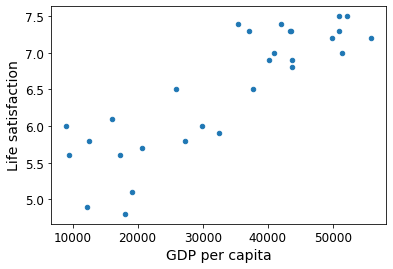

In [8]:
# Prepare the data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)

X = np.c_[country_stats['GDP per capita']]
y = np.c_[country_stats['Life satisfaction']]

# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()

In [9]:
X.shape

(29, 1)

In [10]:
y.shape

(29, 1)

### Build a simple regression model


#### Create a simple linear regression 

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [11]:
# import model
from sklearn.linear_model import LinearRegression

# Create a simple linear regression model
model = LinearRegression()

# Train the model (we use all data for training --> Later we will divide the data into training data and testing data)
model.fit(X, y)

LinearRegression()

In [12]:
print(model.coef_)
print(model.intercept_)

[[4.91154459e-05]]
[4.8530528]


#### Predict y for a new X value

In [13]:
# Make a prediction for Cyprus 
# new data value 22587 for Cyprus's GDP per capita

X_new = [[22587]]

y_predict = model.predict(X_new)

y_predict

array([[5.96242338]])

#### Plot a scatter graph together with the regression function

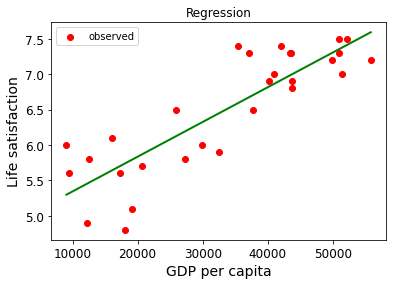

In [14]:
# Plot scatterplot 
plt.scatter(X, y, c='red', label='observed')
plt.legend(loc='best')

plt.xlabel('GDP per capita')
plt.ylabel('Life satisfaction')
plt.title('Regression')

# plot the regression function
plt.plot(X, model.predict(X), c='green', label='fitted', linewidth=2)

plt.show()

### Model Evaluation Example

#### 1. Preparing X and y using pandas
- We already did this process above
- scikit-learn expects X (feature matrix) and y (response vector) to be NumPy arrays.
- However, pandas is built on top of NumPy.
- Thus, X can be a pandas DataFrame and y can be a pandas Series!

See more details about Pandas Series and Numpy

- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html

#### 2. Splitting X and y into training and testing sets

We are using the same data that is stored X, y above. 

In [15]:
from sklearn.model_selection import train_test_split

# split the data into training and testing (test data size 30%)

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                        test_size=0.3, random_state=1)

#### 3. Linear regression in scikit-learn

In [16]:
# import model
from sklearn.linear_model import LinearRegression

# instantiate a simple linear regression model 
linreg = LinearRegression()


# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

LinearRegression()

#### 4. Making predictions for testing data

Use X_test

In [17]:
# make predictions on the testing set
y_pred = linreg.predict(X_test)
y_pred

array([[6.59031623],
       [6.90629497],
       [6.82350342],
       [6.90057464],
       [7.24870458],
       [6.88774681],
       [5.42891846],
       [6.12434396],
       [7.19687366]])

In [18]:
print(linreg.score(X_train, y_train))

0.71190057557096


In [19]:
print(linreg.score(X_test, y_test))

0.5844350680603294


#### 5. Computing the RMSE 

https://scikit-learn.org/stable/modules/model_evaluation.html

In [20]:
from sklearn import metrics

rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
rmse

0.39596209321120834

#### 6. K Cross Validation and Learning Curve

In [21]:
from sklearn.model_selection import KFold # import k-fold validation

kf = KFold(n_splits=3, random_state=None, shuffle=True) # Define the split - into 3 folds 

kf.get_n_splits(X) # returns the number of splitting iterations in the cross-validator

print(kf) 

KFold(n_splits=3, random_state=None, shuffle=True)


##### Setting up a testbed using KFold 

In [22]:
# Let's create a new simple linear regressor
linreg = LinearRegression()

# Conduct 3-fold cross validation

rmse = []
r2 = []
for train_index, test_index in kf.split(X):

    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    
    rmse.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    r2.append(metrics.r2_score(y_test, y_pred))


print(rmse)
print(r2)

[0.3399388675660313, 0.5153135731738482, 0.4813559682890157]
[0.7921984648766844, 0.607699691686809, 0.6342948358378036]


#### Learning Curve

Check the details for learning curve

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.learning_curve.html

[[0.24840057 0.605058   0.30717409]
 [0.36928012 0.60047152 0.52251071]
 [0.57132177 0.56208801 0.5821343 ]
 [0.62903508 0.6567934  0.6481228 ]
 [0.60976523 0.62770915 0.67998645]]
[[0.76488565 0.66091944 1.14559054]
 [1.02735357 0.7106595  0.71703097]
 [0.7562577  0.68536727 0.61698938]
 [0.75723222 0.68482181 0.52579982]
 [0.7244184  0.68704015 0.54289937]]


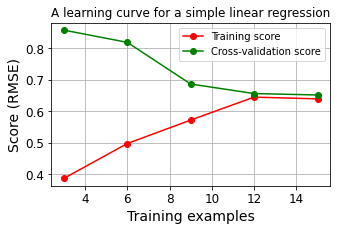

In [23]:
from sklearn.model_selection import learning_curve
    
# evaluate the training and testing and retrieve the information of model performance. 

train_sizes = np.linspace(0.2, 0.8, 5)


train_sizes, train_mse, test_mse = learning_curve(linreg, X, y, 
                                    train_sizes = train_sizes, 
                                    scoring='neg_root_mean_squared_error', 
                                    cv=3, shuffle=True)

train_scores = np.sqrt(np.abs(train_mse))
test_scores = np.sqrt(np.abs(test_mse))

print(train_scores)
print(test_scores)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Plot learning curve
fig, ax = plt.subplots(1, 1, figsize=(5, 3))
    
ax.set_title('A learning curve for a simple linear regression')
ax.set_xlabel("Training examples")
ax.set_ylabel("Score (RMSE)")
ax.grid()

ax.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
ax.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
ax.legend(loc="best")

plt.show()

### (2) Multivariate Linear Regression on a Synthetic Dataset

Simple linear regression can easily be extended to include multiple features. This is called **multiple linear regression**:
### Form of linear regression

$y = \theta_0x_0 + \theta_1x_1 + \theta_2x_2 + ... + \theta_nx_n$

- $y$ is the response
- $x_0 = 1$
- $x_1, x_2, ..., x_n$ are attributes
- $\theta_0$ is the coeffficient for $x_0$ (intercept)
- $\theta_1$ is the coefficient for $x_1$ (the first attribute)
- $\theta_n$ is the coefficient for $x_n$ (the nth attribute)

The $\theta$ values are called the **model coefficients**. These values are "learned" during the model fitting step using the "least squares" criterion. Then, the fitted model can be used to make predictions!

#### Generate a synthetic data
- Each data tuple has 4 attributes in X and its corresponding y value. 

- For generating a random dataset of n=1000 samples for regression modeling, see the detail:

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html#sklearn.datasets.make_regression

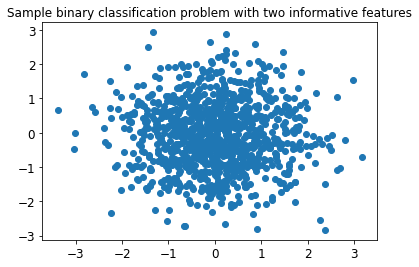

In [24]:
# synthetic dataset for classification (binary)
from sklearn.datasets import make_regression, make_blobs

plt.figure()
plt.title('Sample binary classification problem with two informative features')

# generate X values and y values
# check make_regression() for other parameters
X, y = make_regression(n_samples = 1000, n_features=5,
                                n_informative=2,n_targets=1,
                                noise=0.0, random_state=0)

# Warning!!! scatter() function can handle only 2 dimensions
# Hence you pick two attributes only and plot the data
plt.scatter(X[:, 0], X[:, 3])
plt.show()

#### Split the data into training and test data

In [25]:
from sklearn.model_selection import train_test_split

# split the data into training and testing (test data size 30%)

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                        test_size=0.3, random_state=1)

#### Build a inear regression model

In [26]:
# import model
from sklearn.linear_model import LinearRegression

# instantiate a simple linear regression model 
linreg = LinearRegression()


# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

LinearRegression()

#### Prediction

In [27]:
# make predictions on the testing set
y_pred = linreg.predict(X_test)
y_pred

array([-8.14571146e+01, -1.35144652e+02, -8.36661599e+01,  1.04061111e+02,
        8.08212553e+01,  1.12001966e+02, -9.52264283e+01, -6.71360609e+01,
       -3.10738668e+01,  7.17730923e+01, -6.04865862e+01, -1.61411034e+02,
       -3.48197850e+01, -2.61664993e+01, -1.10917919e+02, -3.69792740e+01,
        5.72945882e+01,  6.08954729e+01,  1.90400352e+01, -9.20592621e+01,
        3.26527660e+01,  5.84659596e+01, -3.37699902e+01, -1.09540887e+01,
       -8.53749279e+01,  6.47397472e+01,  1.41425800e+02,  5.06241812e+01,
        5.54051450e+00,  2.55206676e+01,  5.19136063e+00, -7.34221922e+01,
        6.94669141e+01, -1.43148064e+01, -3.05407500e+01,  1.31091422e+01,
       -1.02154641e+02, -5.41160364e+01, -5.85203338e+01, -1.85263783e+01,
       -1.05525139e+02, -5.86956961e+01,  5.51164958e+01,  3.02243404e+01,
        5.73808239e+01, -9.78340785e+00, -1.79893145e+00,  1.36509701e+02,
       -6.27068524e+01, -5.19580973e+01, -1.22732433e-01,  2.24983673e+01,
        7.24229493e+01,  

#### Check RMSE of the model

In [28]:
from sklearn import metrics

rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
rmse

4.425234823553896e-14

#### K-cross validation

In [29]:
from sklearn.model_selection import KFold # import k-fold validation

kf = KFold(n_splits=3, random_state=None, shuffle=True) # Define the split - into 3 folds 

kf.get_n_splits(X) # returns the number of splitting iterations in the cross-validator

print(kf) 

# Let's create a new simple linear regressor
linreg = LinearRegression()

# Conduct 3-fold cross validation

rmse = []
r2 = []
for train_index, test_index in kf.split(X):

    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    
    rmse.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    r2.append(metrics.r2_score(y_test, y_pred))

print(rmse, '\n Average RMSE:', np.mean(rmse))
print(r2, '\n Average R2:', np.mean(r2))

KFold(n_splits=3, random_state=None, shuffle=True)
[4.3967840079147884e-14, 3.632134890071643e-14, 2.156431707963621e-14] 
 Average RMSE: 3.395116868650018e-14
[1.0, 1.0, 1.0] 
 Average R2: 1.0


#### Learning curve

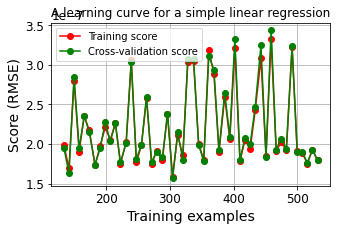

In [30]:
from sklearn.model_selection import learning_curve
    
# evaluate the training and testing and retrieve the information of model performance. 

train_sizes = np.linspace(0.2, 0.8, 50)

train_sizes, train_mse, test_mse = learning_curve(linreg, X, y, 
                                    train_sizes = train_sizes, 
                                    scoring='neg_root_mean_squared_error', 
                                    cv=3, shuffle=True)

train_scores = np.sqrt(np.abs(train_mse))
test_scores = np.sqrt(np.abs(test_mse))

#print(train_scores)
#print(test_scores)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Plot learning curve
fig, ax = plt.subplots(1, 1, figsize=(5, 3))
    
ax.set_title('A learning curve for a simple linear regression')
ax.set_xlabel("Training examples")
ax.set_ylabel("Score (RMSE)")
ax.grid()

ax.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
ax.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
ax.legend(loc="best")

plt.show()

###  Part 1: Explore insight of the data using simple regression

The following Git repository is for the COVID-19 visual dashboard operated by the Johns Hopkins University Center for Systems Science and Engineering:
https://github.com/CSSEGISandData/COVID-19

Read the information on the dashboard and check the datasets details

Datasets are located in a folder: csse_covid_19_data

### Tasks

1. Select day for X and # of cases for y from either US only or all data.

   1.1 (optional) If you find any missing data or/and invalid data in the selected attributes you would like to work on, apply tools to handle these data. 

2. Conduct preliminary exploratory data analysis on the selected data and visualize the data. This may include the following but not limited:

    - The five number summary, box plots, histograms, or/and scatter plots. 

3. Display simple linear regression function with a scatter plot
    --> You will see the data does not follow a simple linear function. 
   
4. Create a logistic regression function instead of a simple linear regression. See the web resources below:

    from sklearn.linear_model import LogisticRegression
    
    - This time draw a scatter plot of the data together with the logistic regression function. 

#### (1) Load data

- Examples in the next three cells show how to obtain data from web resources and load the data to DataFrame.

- You should modify the code for the datasets and data attributes you are interested. 

##### Obtain data from the Web

In [31]:
import os
datapath = os.path.join("csse_covid_19_data", "csse_covid_19_data", "")

import urllib
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv"
os.makedirs(datapath, exist_ok=True)
for filename in ("time_series_covid19_confirmed_US.csv",):
    print("Downloading", filename)
    url = DOWNLOAD_ROOT + "csse_covid_19_data/csse_covid_19_data/" + filename
    urllib.request.urlretrieve(DOWNLOAD_ROOT, datapath + filename)

In [32]:
us_confirmed_timeseries = pd.read_csv(datapath + "time_series_covid19_confirmed_US.csv")
wash_cases = us_confirmed_timeseries.loc[us_confirmed_timeseries["Province_State"] == "Washington"]
wash_cases = wash_cases.drop(columns=['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Lat', 'Long_'
, 'Combined_Key'])
cases_by_date = wash_cases.sum()

##### Load data to DataFrame

In [33]:
df = pd.DataFrame({'date':cases_by_date.index, 'cases':cases_by_date.values})
df['day_number'] = df.index

print(X.shape)
print(y.shape)

(1000, 5)
(1000,)


#### (2) EDA

In [45]:
print(df.head())
print(df.info())
print(df.describe())

      date  cases  day_number
0  1/22/20      1           0
1  1/23/20      1           1
2  1/24/20      1           2
3  1/25/20      1           3
4  1/26/20      1           4
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 831 entries, 0 to 830
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        831 non-null    object
 1   cases       831 non-null    int64 
 2   day_number  831 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 19.6+ KB
None
              cases  day_number
count  8.310000e+02  831.000000
mean   4.438451e+05  415.000000
std    4.462058e+05  240.033331
min    1.000000e+00    0.000000
25%    6.812000e+04  207.500000
50%    3.485160e+05  415.000000
75%    6.714945e+05  622.500000
max    1.498116e+06  830.000000


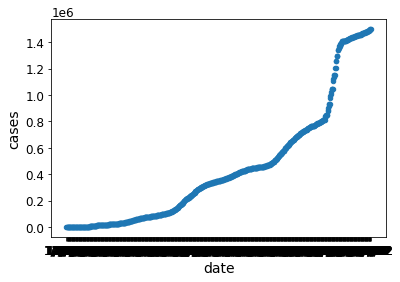

In [35]:
df.plot(kind = 'scatter', x = 'date', y = 'cases')

plt.show()

#### (3) A linear regression model

- Train a linear regression model
- Visualize the model with scatter plot
- Conduct k=10 cross validation and show the result
- Display learning curve based on training data

In [36]:
X = np.c_[df['day_number']]
y = np.c_[df['cases']]
X_train, X_test, y_train, y_test = train_test_split(X, y)

# instantiate a simple linear regression model 
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

LinearRegression()

In [37]:
# make predictions on the testing set
y_pred = linreg.predict(X_test)
print(linreg.score(X_train, y_train))
print(linreg.score(X_test, y_test))

rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print(rmse)

0.8544966275602197
0.846720246516786
172576.26370460272


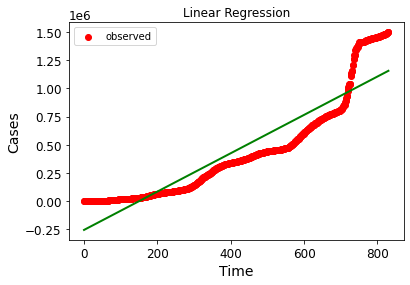

In [38]:
plt.scatter(X, y, c='red', label='observed')
plt.legend(loc='best')
plt.plot(X, linreg.predict(X), c='g', label='fitted',linewidth=2)
plt.xlabel('Time')
plt.ylabel('Cases')
plt.title('Linear Regression')
plt.show()

In [39]:
kf = KFold(n_splits=10, random_state=None, shuffle=True) # Define the split - into 3 folds 

print(kf) 

# Let's create a new simple linear regressor
linreg = LinearRegression()

# Conduct 10-fold cross validation
rmse = []
r2 = []
for train_index, test_index in kf.split(X):

    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    
    rmse.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    r2.append(metrics.r2_score(y_test, y_pred))


print(rmse)
print(r2)

KFold(n_splits=10, random_state=None, shuffle=True)
[159203.6484038781, 161303.30327922865, 179198.73597889606, 163662.81337670816, 175693.73760838105, 165168.4563696435, 175489.9174298237, 191880.8683574727, 174764.50576053173, 166986.75719877894]
[0.8583885189094359, 0.8278201209574572, 0.8560958271820676, 0.853574421915796, 0.8458415627226631, 0.8537201085143669, 0.8472486187934802, 0.8545496929273927, 0.8544682803871756, 0.8498020047689483]


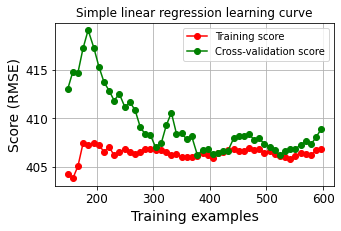

In [40]:
# evaluate the training and testing and retrieve the information of model performance. 
train_sizes = np.linspace(0.2, 0.8, 50)

train_sizes, train_mse, test_mse = learning_curve(linreg, X, y, 
                                    train_sizes = train_sizes, 
                                    scoring='neg_root_mean_squared_error', 
                                    cv=10, shuffle=True)

train_scores = np.sqrt(np.abs(train_mse))
test_scores = np.sqrt(np.abs(test_mse))


train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Plot learning curve
fig, ax = plt.subplots(1, 1, figsize=(5, 3))
    
ax.set_title('Simple linear regression learning curve')
ax.set_xlabel("Training examples")
ax.set_ylabel("Score (RMSE)")
ax.grid()

ax.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
ax.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
ax.legend(loc="best")

plt.show()

#### (4) A logistic regression model

- Train a logistic regression model
- Visualize the model with scatter plot
- Conduct k=10 cross validation and show the result
- Display learning curve based on training data size

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(X_train)
X = scaler.transform(X)

# split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y)

# instantiate a simple linear regression model 
logreg = LogisticRegression()

# fit the model to the training data (learn the coefficients)
logreg.fit(X_train, y_train.ravel())

LogisticRegression()

In [42]:
y_pred = logreg.predict(X_test)
print(logreg.score(X_train, y_train))
print(logreg.score(X_test, y_test))

rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

0.04654895666131621
0.07692307692307693


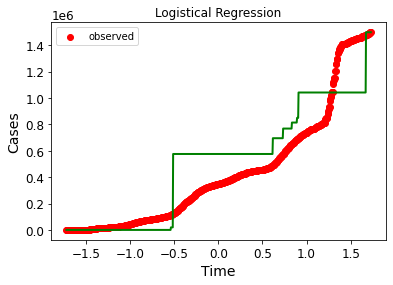

In [43]:
plt.scatter(X, y, c='red', label='observed')
plt.legend(loc='best')
plt.plot(X, logreg.predict(X), c='g', label='fitted',linewidth=2)
plt.xlabel('Time')
plt.ylabel('Cases')
plt.title('Logistical Regression')
plt.show()

C:\Users\seang\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


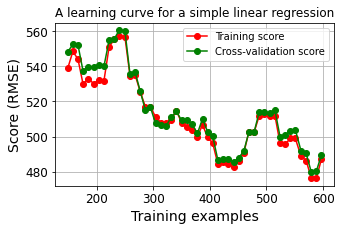

In [44]:
# evaluate the training and testing and retrieve the information of model performance. 
train_sizes = np.linspace(0.2, 0.8, 50)

train_sizes, train_mse, test_mse = learning_curve(logreg, X, y.ravel(), 
                                    train_sizes = train_sizes, 
                                    scoring='neg_root_mean_squared_error', 
                                    cv=10, shuffle=True)

train_scores = np.sqrt(np.abs(train_mse))
test_scores = np.sqrt(np.abs(test_mse))

#print(train_scores)
#print(test_scores)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Plot learning curve
fig, ax = plt.subplots(1, 1, figsize=(5, 3))
    
ax.set_title('A learning curve for a simple logistic regression')
ax.set_xlabel("Training examples")
ax.set_ylabel("Score (RMSE)")
ax.grid()

ax.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
ax.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
ax.legend(loc="best")

### Part 2: Write a summary of what you find from the data

- Submit your summary to Canvas
- Provide a link to your Git repo of the assignment. 

Logistic regression is better than linear regression but still it results in a low score. 

The data shown above tracks the number of COVID-19 Cases in Washington State. The data shows little change until day 40 where the cases start to increase exponentially. Due to this, a linear model is insufficiant. Furthermore, a logistic model works much better. It should be noted that the number of cases is changing due to external factors such as social distancing and really cannot be modeled based on either of these models long term.

Note to reader: These Cross Validation Scores were calculated on 4/20/2022. Since the csv file is updated frequently as new data comes in and the data in this notebook changes as a result, I do not expect the scores to remain the same. If we have a true flattening of the curve the linear model will perform better in the new part and the logistic model will perform worse.